<h1 align="center">Volume 3: Web Scraping 2</h1>
    <Name>
    <Class>
    <Date>

In [3]:
import re
import time
import requests
from bs4 import BeautifulSoup
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

from matplotlib import pyplot as plt, rcParams
%matplotlib inline
rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

## Problem 1
Modify `wunder_temp()` (below) so that it gathers the Actual Mean Temperature, Actual Max Temperature, and Actual Min Temperature for every day in July of 2012.
Plot these three measurements against time on the same plot.
Consider printing information at each iteration of the outer loop to keep track of the program’s progress.

Display the plot inline below.

In [2]:
# Problem 1
def wunder_temp(day="/history/airport/KSAN/2012/7/1/DailyHistory.html"):
    """Crawl through Weather Underground and extract temperature data."""
    # Initialize variables, including a regex for finding the 'Next Day' link.
    actual_mean_temp = []
    actual_max_temp = []
    actual_min_temp = []
    next_day_finder = re.compile(r"Next Day")
    base_url = "https://www.wunderground.com"       # Web page base URL.
    page = base_url + day                           # Complete page URL.
    current1 = None
    current2 = None
    current3 = None

    for day in range(1,32):
        print("Processing July {}, 2012".format(day))
        while current1 is None or current2 is None or current3 is None:  # Try downloading until it works.
            # Download the page source and PAUSE before continuing.
            page_source = requests.get(page).text
            time.sleep(1)           # PAUSE before continuing.
            soup = BeautifulSoup(page_source, "html.parser")
            current1 = soup.find(string="Mean Temperature")
            current2 = soup.find(string="Max Temperature")
            current3 = soup.find(string="Min Temperature")

        # Navigate to the relevant tag, then extract the temperature data.
        temp_tag = current1.parent.parent.next_sibling.next_sibling.span.span
        actual_mean_temp.append(int(temp_tag.string))
        temp_tag = current2.parent.parent.next_sibling.next_sibling.span.span
        actual_max_temp.append(int(temp_tag.string))
        temp_tag = current3.parent.parent.next_sibling.next_sibling.span.span
        actual_min_temp.append(int(temp_tag.string))

        # Find the URL for the page with the next day's data.
        new_day = soup.find(string=next_day_finder).parent["href"]
        page = base_url + new_day                   # New complete page URL.
        current1, current2, current3 = None, None, None

    return actual_mean_temp, actual_max_temp, actual_min_temp

actual_mean_temp, actual_max_temp, actual_min_temp = wunder_temp()

Processing July 1, 2012
Processing July 2, 2012
Processing July 3, 2012
Processing July 4, 2012
Processing July 5, 2012
Processing July 6, 2012
Processing July 7, 2012
Processing July 8, 2012
Processing July 9, 2012
Processing July 10, 2012
Processing July 11, 2012
Processing July 12, 2012
Processing July 13, 2012
Processing July 14, 2012
Processing July 15, 2012
Processing July 16, 2012
Processing July 17, 2012
Processing July 18, 2012
Processing July 19, 2012
Processing July 20, 2012
Processing July 21, 2012
Processing July 22, 2012
Processing July 23, 2012
Processing July 24, 2012
Processing July 25, 2012
Processing July 26, 2012
Processing July 27, 2012
Processing July 28, 2012
Processing July 29, 2012
Processing July 30, 2012
Processing July 31, 2012


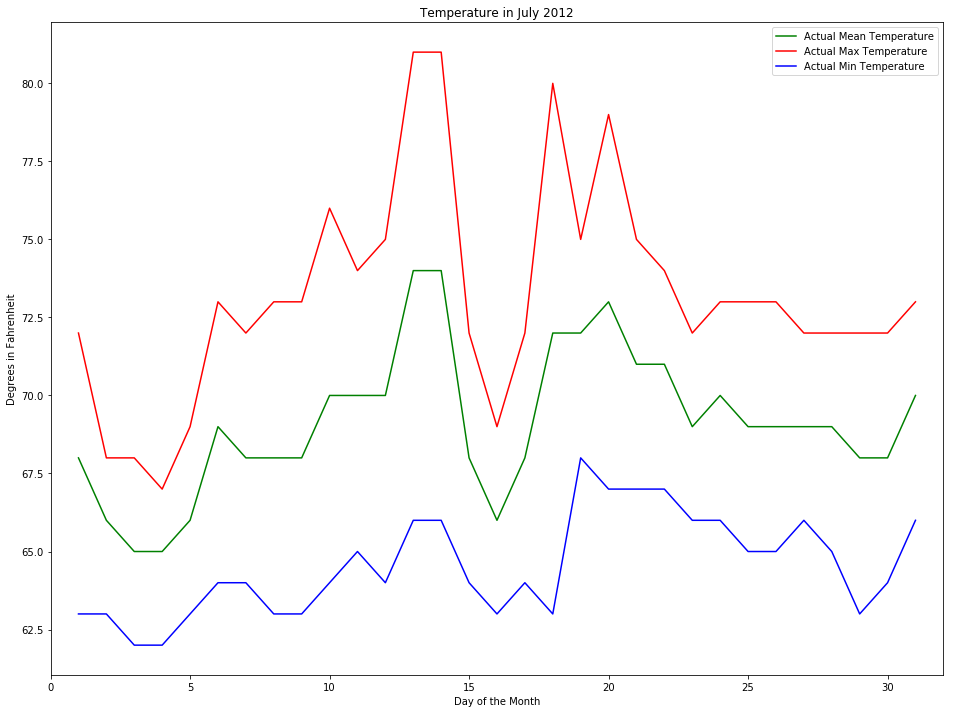

In [3]:
plt.plot(np.arange(1,len(actual_mean_temp)+1), actual_mean_temp, 'g', label='Actual Mean Temperature')
plt.plot(np.arange(1,len(actual_mean_temp)+1), actual_max_temp, 'r', label='Actual Max Temperature')
plt.plot(np.arange(1,len(actual_mean_temp)+1), actual_min_temp, 'b', label='Actual Min Temperature')
plt.legend()
plt.xlim(0,32)
plt.xlabel("Day of the Month")
plt.ylabel("Degrees in Fahrenheit")
plt.title("Temperature in July 2012")
plt.show()

## Problem 2

Modify `bank_data()` so that it extracts the total consolidated assets ("Consol Assets") for JPMorgan Chase, Bank of America, and Wells Fargo recorded each December from 2004 to the present.
In a single figure, plot each bank’s assets against time.
Be careful to keep the data sorted by date.

Display the plot inline below.

In [4]:
# Problem 2
def bank_data():
    """Crawl through the Federal Reserve site and extract bank data."""
    # Compile regular expressions for finding certain tags.
    link_finder = re.compile(r"December 31, (200[4-9]|201[0-9])$")
    chase_bank_finder = re.compile(r"^JPMORGAN CHASE BK")
    boa_finder = re.compile(r"^BANK OF AMER NA")
    wellsfargo_finder = re.compile(r"^WELLS FARGO BK NA")

    # Get the base page and find the URLs to all other relevant pages.
    base_url="https://www.federalreserve.gov/releases/lbr/"
    base_page_source = requests.get(base_url).text
    base_soup = BeautifulSoup(base_page_source, "html.parser")
    link_tags = base_soup.find_all(name='a', href=True, string=link_finder)
    pages = [base_url + tag.attrs["href"] for tag in link_tags]
    
    # Crawl through the individual pages and record the data.
    chase_assets = []
    boa_assets = []
    wellsfargo_assets = []
    for page in pages:
        time.sleep(1)               # PAUSE, then request the page.
        soup = BeautifulSoup(requests.get(page).text, "html.parser")

        # Find the tag corresponding to Chase Banks's consolidated assets.
        temp_tag = soup.find(name="td", string=chase_bank_finder)
        for _ in range(10):
            temp_tag = temp_tag.next_sibling
        # Extract the data, removing commas.
        chase_assets.append(int(temp_tag.string.replace(',', '')))

        # Find the tag corresponding to Bank of America's consolidated assets.
        temp_tag = soup.find(name="td", string=boa_finder)
        for _ in range(10):
            temp_tag = temp_tag.next_sibling
        boa_assets.append(int(temp_tag.string.replace(',', '')))
        
        # Find the tag corresponding to Wells Fargo's consolidated assets.
        temp_tag = soup.find(name="td", string=wellsfargo_finder)
        for _ in range(10):
            temp_tag = temp_tag.next_sibling
        wellsfargo_assets.append(int(temp_tag.string.replace(',', '')))

    return chase_assets, boa_assets, wellsfargo_assets

chase_assets, boa_assets, wellsfargo_assets = bank_data()

In [5]:
print(bank_data())

([2082803, 1914658, 2074952, 1945467, 1896773, 1811678, 1631621, 1627684, 1746242, 1318888, 1179390, 1013985, 967365], [1677490, 1639305, 1574093, 1433716, 1474077, 1451969, 1482278, 1465221, 1471631, 1312794, 1196124, 1082243, 771619], [1727235, 1610580, 1532784, 1373600, 1266125, 1161490, 1102278, 608778, 538958, 467861, 398671, 403258, 366256])


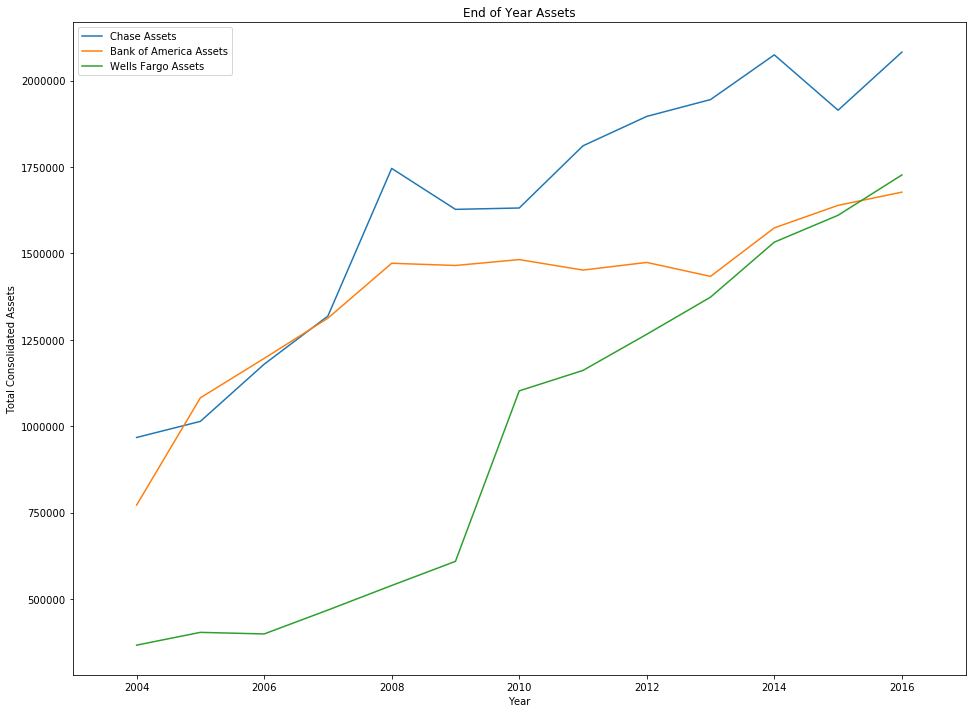

In [6]:
years = np.arange(2004, 2017)
plt.plot(years, chase_assets[::-1], label = 'Chase Assets')
plt.plot(years, boa_assets[::-1], label = 'Bank of America Assets')
plt.plot(years, wellsfargo_assets[::-1], label = 'Wells Fargo Assets')
plt.legend()
plt.xlim(2003, 2017)
plt.xlabel("Year")
plt.ylabel("Total Consolidated Assets")
plt.title("End of Year Assets")
plt.show()

## Problem 3

ESPN hosts data on NBA athletes at http://www.espn.go.com/nba/statistics.
Each player has their own page with detailed performance statistics.
For each of the five offensive leaders in points and each of the five defensive leaders in rebounds, extract the player's career minutes per game (MPG) and career points per game (PPG).
Make a scatter plot of MPG against PPG for these ten players.

Display the plot inline below.

In [7]:
# Problem 2
def bank_data():
    """Crawl through the NBA statistics site and extract player data."""
    # Compile regular expressions for finding certain tags.
    link_finder = re.compile(r"December 31, (200[4-9]|201[0-9])$")
    offensive_find = re.compile(r"^Offensive Leaders")
    defensive_find = re.compile(r"^Defensive Leaders")
    wellsfargo_finder = re.compile(r"^WELLS FARGO BK NA")

    # Get the base page and find the URLs to all other relevant pages.
    base_url = "http://www.espn.com/nba/statistics"
    base_page_source = requests.get(base_url).text
    base_soup = BeautifulSoup(base_page_source, "html5lib")
    
    offensive_table = 
    link_tags = base_soup.find_all(name='a', href=True, string=link_finder)
    pages = [base_url + tag.attrs["href"] for tag in link_tags]
    
    # Crawl through the individual pages and record the data.
    mpg = []
    ppg = []
    for page in pages:
        time.sleep(1)               # PAUSE, then request the page.
        soup = BeautifulSoup(requests.get(page).text, "html.parser")

        # Find the tag corresponding to Chase Banks's consolidated assets.
        temp_tag = soup.find(name="td", string=chase_bank_finder)
        for _ in range(10):
            temp_tag = temp_tag.next_sibling
        # Extract the data, removing commas.
        chase_assets.append(int(temp_tag.string.replace(',', '')))

        # Find the tag corresponding to Bank of America's consolidated assets.
        temp_tag = soup.find(name="td", string=boa_finder)
        for _ in range(10):
            temp_tag = temp_tag.next_sibling
        boa_assets.append(int(temp_tag.string.replace(',', '')))
        
        # Find the tag corresponding to Wells Fargo's consolidated assets.
        temp_tag = soup.find(name="td", string=wellsfargo_finder)
        for _ in range(10):
            temp_tag = temp_tag.next_sibling
        wellsfargo_assets.append(int(temp_tag.string.replace(',', '')))

    return chase_assets, boa_assets, wellsfargo_assets


## Problem 4

The arXiv (pronounced "archive") is an online repository of scientific publications, hosted by Cornell University.
Write a function that accepts a string to serve as a search query.
Use Selenium to enter the query into the search bar of https://arxiv.org and press Enter.
The resulting page has up to 25 links to the PDFs of technical papers that match the query.
Gather these URLs, then continue to the next page (if there are more results) and continue gathering links until obtaining at most 100 URLs.

Print the list of URLs below.

In [14]:
# Problem 4
def arXiv(query):
    arxiv = 'https://arxiv.org'
    browser = webdriver.Chrome()
    try:
        browser.get(arxiv)
        try:
            search_bar = browser.find_element_by_name('query')
            # return search_bar
            search_bar.clear()
            search_bar.send_keys(query)
            search_bar.send_keys(Keys.RETURN)
        except NoSuchElementException:
            print("Could not find the search bar, kiddo. Try again.")
            raise
        else:
            time.sleep(1)
            pdf_links = []
            next_page = True
            i = 0
            while next_page and i < 4:
                soup = BeautifulSoup(browser.page_source, 'html.parser')
                temp_links = soup.find_all(name = 'a', attrs={'title':'Download PDF'})
                pdf_links.extend([arxiv+link.attrs['href'] for link in temp_links])
                i += 1
                next_results = soup.find_all(string=re.compile(r'Next [0-9]{1,2} results'))
                next_results = [tag.parent for tag in next_results]
                if next_results:
                    browser.get(arxiv + next_results[0].attrs['href'])
                else:
                    print("No more results to be found.")
                    next_page = False
    finally:
        browser.close()
        return pdf_links

In [15]:
links = arXiv('instrumental variables')
print(links)
print(len(links))

['https://arxiv.org/pdf/1406.7863', 'https://arxiv.org/pdf/1406.7785', 'https://arxiv.org/pdf/1406.7303', 'https://arxiv.org/pdf/1406.6892', 'https://arxiv.org/pdf/1406.6600', 'https://arxiv.org/pdf/1406.6383', 'https://arxiv.org/pdf/1406.6278', 'https://arxiv.org/pdf/1406.6068', 'https://arxiv.org/pdf/1406.5320', 'https://arxiv.org/pdf/1406.4716', 'https://arxiv.org/pdf/1406.4010', 'https://arxiv.org/pdf/1406.3639', 'https://arxiv.org/pdf/1406.3241', 'https://arxiv.org/pdf/1406.1787', 'https://arxiv.org/pdf/1406.1665', 'https://arxiv.org/pdf/1406.0706', 'https://arxiv.org/pdf/1402.6884', 'https://arxiv.org/pdf/1402.6186', 'https://arxiv.org/pdf/1402.6122', 'https://arxiv.org/pdf/1402.5978', 'https://arxiv.org/pdf/1402.5575', 'https://arxiv.org/pdf/1402.4782', 'https://arxiv.org/pdf/1402.4408', 'https://arxiv.org/pdf/1402.4066', 'https://arxiv.org/pdf/1402.2582', 'https://arxiv.org/pdf/1402.2332', 'https://arxiv.org/pdf/1402.1977', 'https://arxiv.org/pdf/1402.1762', 'https://arxiv.org/

## Problem 5

Project Euler (https://projecteuler.net) is a collection of mathematical computing problems.
Each problem is listed with an ID, a description/title, and the number of users that have solved the problem.

Using Selenium, BeautifulSoup, or both, for each of the (at least) 600 problems in the archive at https://projecteuler.net/archives, record the problem ID and the number of people who have solved it.
Return a list of IDs, sorted from largest to smallest by the number of people who have solved them.
That is, the first entry in the list should be the ID of the most solved problem, and the last entry in the list should be the ID of the least solved problem.

Print the list of problems IDs below.

In [46]:
# Problem 5
def euler_rankings():
    base = 'https://projecteuler.net/'
    soup = BeautifulSoup(requests.get('https://projecteuler.net/archives').text, 'html5lib')
    ids = []
    solved = []
    i = 0
    while len(ids) < 600:
        time.sleep(2)
        numbers = soup.find_all(name='td', attrs={'class':'id_column'})
        # return numbers
        ids.extend([int(tag.string) for tag in numbers])
        solved.extend([int(tag.parent.contents[-1].string) for tag in numbers])
        next_page = soup.find(name='a', attrs={'class':'current', 'href':re.compile(r'archives')})
        # return next_page
        soup = BeautifulSoup(requests.get(base + next_page.attrs['href']).text, 'html5lib')
        i +=1
        print("Processed Page {}".format(i))
        if i >= 13:
            print("Returning unsorted IDs")
            return ids
    ids = np.array(ids)
    solved = np.array(solved)
    return ids[np.argsort(solved)]

print(euler_rankings())
#test = euler_rankings()

Processed Page 1
Processed Page 2
Processed Page 3
Processed Page 4
Processed Page 5
Processed Page 6
Processed Page 7
Processed Page 8
Processed Page 9
Processed Page 10
Processed Page 11
Processed Page 12
[44 44 44 44 44 44 44 44 44 44 44 44 49 49 49 49 49 49 49 49 49 49 49 49 47
 47 47 47 47 47 47 47 47 47 47 47 43 43 43 43 43 43 43 43 43 43 43 43 46 46
 46 46 46 46 46 46 46 46 46 46 50 50 50 50 50 50 50 50 50 50 50 50 38 38 38
 38 38 38 38 38 38 38 38 38 41 41 41 41 41 41 41 41 41 41 41 41 32 32 32 32
 32 32 32 32 32 32 32 32 45 45 45 45 45 45 45 45 45 45 45 45 33 33 33 33 33
 33 33 33 33 33 33 33 39 39 39 39 39 39 39 39 39 39 39 39 37 37 37 37 37 37
 37 37 37 37 37 37 42 42 42 42 42 42 42 42 42 42 42 42 40 40 40 40 40 40 40
 40 40 40 40 40 26 26 26 26 26 26 26 26 26 26 26 26 31 31 31 31 31 31 31 31
 31 31 31 31 35 35 35 35 35 35 35 35 35 35 35 35 27 27 27 27 27 27 27 27 27
 27 27 27 36 36 36 36 36 36 36 36 36 36 36 36 34 34 34 34 34 34 34 34 34 34
 34 34 23 23 23 23 23 23 23 23 23

In [44]:
print(test)

[<td class="id_column">1</td>, <td class="id_column">2</td>, <td class="id_column">3</td>, <td class="id_column">4</td>, <td class="id_column">5</td>, <td class="id_column">6</td>, <td class="id_column">7</td>, <td class="id_column">8</td>, <td class="id_column">9</td>, <td class="id_column">10</td>, <td class="id_column">11</td>, <td class="id_column">12</td>, <td class="id_column">13</td>, <td class="id_column">14</td>, <td class="id_column">15</td>, <td class="id_column">16</td>, <td class="id_column">17</td>, <td class="id_column">18</td>, <td class="id_column">19</td>, <td class="id_column">20</td>, <td class="id_column">21</td>, <td class="id_column">22</td>, <td class="id_column">23</td>, <td class="id_column">24</td>, <td class="id_column">25</td>, <td class="id_column">26</td>, <td class="id_column">27</td>, <td class="id_column">28</td>, <td class="id_column">29</td>, <td class="id_column">30</td>, <td class="id_column">31</td>, <td class="id_column">32</td>, <td class="id_co